source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [ ]:
%pwd

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pwd

In [ ]:
!ls ..

In [2]:
path = 'Capstone1_Data'
filepath1 = os.path.join('..', path,'dataframe.csv') #if file is not in same dir as notebook, must change path
filepath2 = os.path.join('..', path,'dataframe_all_timestamps.csv') #if file is not in same dir as notebook, must change path

df = pd.read_csv(filepath1)
df_all_timestamps = pd.read_csv(filepath2)

In [3]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [4]:
#optional
# makes new columns by taking the logarithm of the views, likes, 
#dislikes and comment_count to compress the scale for easier graphing 

import numpy as np
df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df_all_timestamps.info()

In [9]:
video_likes = pd.DataFrame(df, columns=['video_id','likes', 'country'])
video_likes.head()

,video_id,likes,country
0,cJon8yBKv3g,1596,FR
1,g12KeCPRB4Q,1032,FR
2,irIZRH3JlIw,1415,FR
3,SnHtzkQZggA,142,FR
4,u6EoWM2KMPE,1159,FR


In [47]:
video_likes_base = pd.DataFrame(df, columns=['video_id','title','category','log_likes', 'log_views', 'country'])
video_likes = video_likes_base.sort_values(by=['log_likes'], ascending=False)
video_likes.head()

,video_id,title,category,log_likes,log_views,country
160289,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,15.540743,18.627784,GB
167397,VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,Music,15.510124,19.375121,GB
107307,xpVfcZ0ZcFM,Drake - God’s Plan,Music,15.371099,19.369109,GB
105767,kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,Music,15.156776,19.611144,GB
155749,ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,Music,15.037649,19.157256,GB


In [54]:
top_video_like = video_likes_base.head(100)
top_video_like


,video_id,title,category,log_likes,log_views,country
0,cJon8yBKv3g,Kingsman : Le Cercle d'or (Mickael J Critique),Film & Animation,7.375882,9.877554,FR
1,g12KeCPRB4Q,Vide grenier LIVE - 12 Novembre 2017,Gaming,6.940222,9.940061,FR
2,irIZRH3JlIw,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,News & Politics,7.255591,12.242660,FR
3,SnHtzkQZggA,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,Film & Animation,4.962845,9.674074,FR
4,u6EoWM2KMPE,"Portokalli, 12 Nentor 2017 - Policat e postbll...",Comedy,7.056175,11.518987,FR
...,...,...,...,...,...,...
95,-bqyTKrGq18,DÉFIS TECHNIQUE INCROYABLE ! FOOTBALL SKILLS,Sports,8.089176,10.931624,FR
96,LucUgZucG9M,JE REFAIS DES PHOTOS ! #DÉFI,Entertainment,8.908965,11.492488,FR
97,1Cat-Fxks_s,La cuisson des œufs à la coque différente au M...,Comedy,3.332205,7.622175,FR
98,w9_TuLo3Ao0,ملخص مباراة المغرب وكوت ديفوار 2-0 شاشة كاملة ...,Sports,7.852439,13.511771,FR


In [49]:
num_top100_by_country = top_video_like['country'].value_counts()
num_top100_by_country

GB    76
US    15
IN     4
MX     2
CA     2
KR     1
Name: country, dtype: int64

Text(0, 0.5, 'Number of videos')

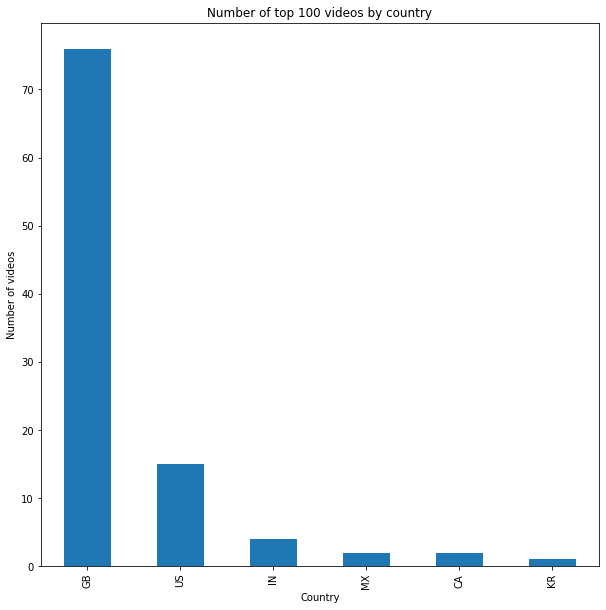

In [39]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
num_top100_by_country.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of top 100 videos by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [52]:
num_top100_by_category = top_video_like['category'].value_counts()
num_top100_by_category

Music                    75
Entertainment            14
Sports                    3
Comedy                    3
Film & Animation          2
Nonprofits & Activism     1
Gaming                    1
People & Blogs            1
Name: category, dtype: int64

Text(0, 0.5, 'Number of videos')

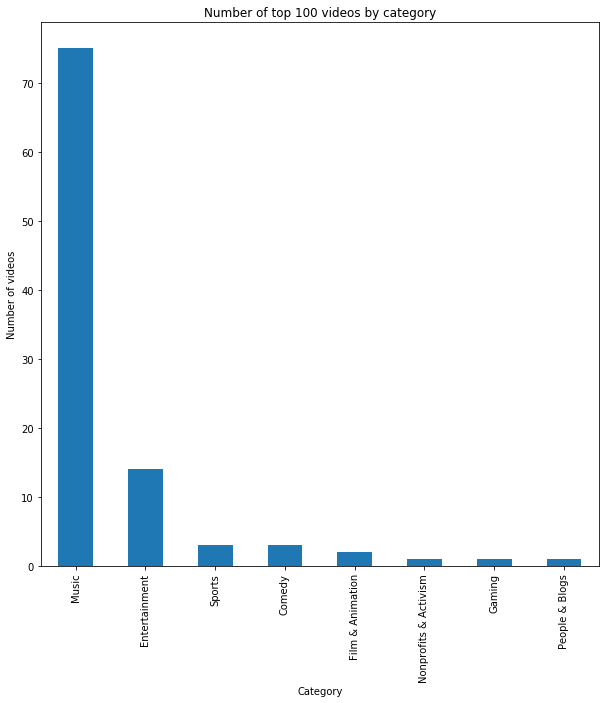

In [53]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
num_top100_by_category.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of top 100 videos by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [15]:
category = df['category']
category.head()

0    Film & Animation
1              Gaming
2     News & Politics
3    Film & Animation
4              Comedy
Name: category, dtype: object

In [16]:
category.loc[1:100]

1                    Gaming
2           News & Politics
3          Film & Animation
4                    Comedy
5                    Sports
               ...         
96            Entertainment
97                   Comedy
98                   Sports
99                   Comedy
100    Science & Technology
Name: category, Length: 100, dtype: object

In [17]:
cat_counts = category.value_counts()
print(cat_counts)

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64


In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
cat_counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of videos by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
df.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of likes by category') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of likes')# Set text for y axis

In [ ]:
country = df['country']
country.head()

In [ ]:
country_count = df['country'].value_counts() 
country_count

In [ ]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis    
country_count.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
ax.set_title('Number of videos by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of videos')# Set text for y axis

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'views', y = 'likes', ax = ax)
ax.set_title('Scatter plot of views vs likes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 20)) # define plot area
ax = fig.gca() # define axis                   
df.plot(kind = 'scatter', x = 'category_id', y = 'likes', ax = ax)
ax.set_title('Scatter plot of views vs likes') # Give the plot a main title
ax.set_xlabel('Views') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis